Zadanie:
1. Sprawdź wyniki klasyfikatora dla różnych wartości test_size (0.2, 0.4, 0.6, 0.8)
2. Sprawdź wyniki klasyfikatora dla różnych kerneli ('linear', 'poly', 'rbf')
3. Przedstaw wszystko na jednym wykresie, gdzie na os X będzie test_size a na osi Y accuracy. Wykres każdego z kerneli powinien być zaznaczony innym kolorem.
4.
Sprawozdanie powinno zawierać następujące punkty: a. prezentacja zbioru, 1-2 zdania oraz dowolne inne podsumowania b. prezentacja pracy własnej, punkty 1-3 c. własne wnioski

Prezentacja zbioru:

In [4]:
import pandas as pd
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

**Praca własna**
- Zamiana dataframe na array
- tworzenie zmiennej, która zawiera dane (pomiary)
- tworzenie zmiennej, która zawiera etykiety

In [14]:
import numpy as np
data = np.asarray(df)

X = data[:, 0:13] #zmienna X zawiera wszystkie pomiary od kolumny 0 do 12
y = data[:,13] #zmienna y zawiera etykietę (output)

ćwiczenie zbioru testowego oraz zadanie:

Sprawdź wyniki klasyfikatora dla różnych wartości test_size (0.2, 0.4, 0.6, 0.8)




In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
#podział na dane treningowe i testowe
#0.2 oznacza, że 20% będzie w zbiorze walidacyjnym (testowym)

model = SVC(kernel = 'linear') #stworzenie klasyfikatora

model.fit(X_train, y_train) #trenowanie klasyfikatora - naucz się dopasować dane uczące do etykiet

y_pred = model.predict(X_test) #predykcja na danych testowych

acc = accuracy_score(y_test, y_pred)
print(acc)


0.8688524590163934


Sprawdź wyniki klasyfikatora dla różnych kerneli ('linear', 'poly', 'rbf')

In [28]:
def classification(X,y,kernel, train_size):
    #random state - wyłączamy losowość, ustawiamy sobie parametry startowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state = 42) #podział na dane treningowe i testowe
    model = SVC(kernel = kernel) #stworzenie klasyfikatora
    model.fit(X_train, y_train) #trenowanie klasyfikatora - naucz się dopasować dane uczące doetykiet
    y_pred = model.predict(X_test) #predykcja na danych testowych
    return accuracy_score(y_test, y_pred)

In [63]:
test_size = [0.2, 0.4, 0.6, 0.8 ]
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    for size in test_size:
        print(kernel, size, classification(X,y, kernel, size))

linear 0.2 0.757201646090535
linear 0.4 0.8296703296703297
linear 0.6 0.8524590163934426
linear 0.8 0.8688524590163934
poly 0.2 0.6378600823045267
poly 0.4 0.6868131868131868
poly 0.6 0.7295081967213115
poly 0.8 0.7704918032786885
rbf 0.2 0.6419753086419753
rbf 0.4 0.6648351648351648
rbf 0.6 0.7213114754098361
rbf 0.8 0.7049180327868853


Przedstaw wszystko na jednym wykresie, gdzie na os X będzie test_size a na osi Y accuracy. Wykres każdego z kerneli powinien być zaznaczony innym kolorem

In [30]:
import matplotlib.pyplot as plt

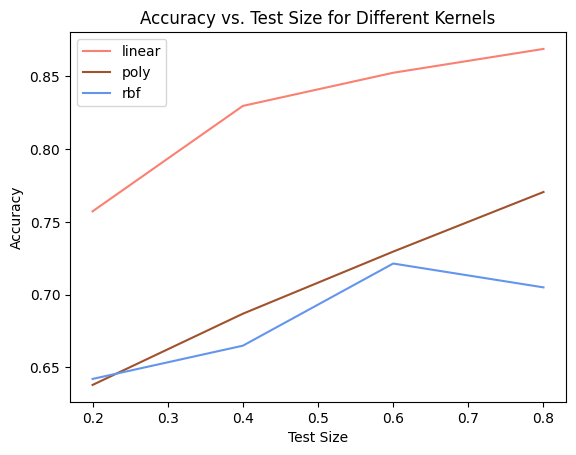

<Figure size 640x480 with 0 Axes>

In [62]:
test_size = [0.2, 0.4, 0.6, 0.8]
kernels = ['linear', 'poly', 'rbf']
accuracy = {
    'linear': [0.757201646090535, 0.8296703296703297, 0.8524590163934426, 0.8688524590163934],
    'poly': [0.6378600823045267, 0.6868131868131868, 0.7295081967213115, 0.7704918032786885],
    'rbf': [0.6419753086419753, 0.6648351648351648, 0.7213114754098361, 0.7049180327868853],
}

colors = {'linear': 'salmon', 'poly': 'sienna', 'rbf': 'cornflowerblue'}

for kernel in kernels:
    plt.plot(test_size, accuracy[kernel], label=kernel, color=colors[kernel])

plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Size for Different Kernels')
plt.legend()
plt.show()
plt.savefig('heart_plot.png')